In [157]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os

# yolo

In [158]:
results_path = '../../model_results/yolo_augmented_exp'
dfs = {}
for folder in os.listdir(results_path):
    print(f"current experiment: {folder}")
    dfs[folder] = pd.read_csv(f'{results_path}/{folder}/results.csv').rename(columns={"Unnamed: 0":"name"})
    dfs[folder]["F1"] = 2 * ((dfs[folder]["p"] * dfs[folder]["r"]) / (dfs[folder]["p"] + dfs[folder]["r"]))
    dfs[folder]["experiment"] = folder.strip()
    dfs[folder].fillna(0, inplace=True)
print(dfs)

current experiment: -175_brightness
current experiment: 150_brightness
current experiment: 125_brightness
current experiment: -25_brightness
current experiment: 75_brightness
current experiment: 9_blur
current experiment: 0.9_salt_pepper
current experiment: 5_blur
current experiment: 6_blur
current experiment: 1_blur
current experiment: -100_brightness
current experiment: -75_brightness
current experiment: 50_brightness
current experiment: 4_blur
current experiment: -125_brightness
current experiment: block
current experiment: 0.3_salt_pepper
current experiment: 0.7_salt_pepper
current experiment: 2_blur
current experiment: 200_brightness
current experiment: -200_brightness
current experiment: 100_brightness
current experiment: stickers
current experiment: 25_brightness
current experiment: 0.8_salt_pepper
current experiment: 0.2_salt_pepper
current experiment: unaugmented
current experiment: 0.1_salt_pepper
current experiment: 0.5_salt_pepper
current experiment: 3_blur
current experime

In [159]:
test = {"A": ["-175_blur", "0.9_salt_pepper", "gaussian_noise", "block"],}
test_df = pd.DataFrame(test)
test_df["A"].str.extract('(-?\d+([.]\d+)?)', expand=False)[0]

0    -175
1     0.9
2     NaN
3     NaN
Name: 0, dtype: object

In [160]:
exps = {
    "brightness": [],
    "salt_pepper": [],
    "gaussian": [],
    "blur": [],
    "unaugmented": [],
    "block": [],
    "stickers": [],
    "avg": []
}
for key, df in dfs.items():
    for key_exps in exps.keys():
        if key_exps in key:
            df_row = df.iloc[0].copy()
            exps[key_exps].append(df_row)

for key, exp in exps.items():
    if key == "avg": continue
    df = pd.DataFrame(exp)
    # extract numbers with a regex and take only the first extraction
    df['sort'] = df['experiment'].str.extract('(-?\d+([.]\d+)?)', expand=False)[0].astype(float)
    df.columns = df.columns.str.strip()
    df['experiment'] = df['experiment'].str.strip()
    df.sort_values(by='sort', inplace=True)
    # df = df.drop('sort', axis=1)
    df.reset_index(drop=True, inplace=True)
    exps[key] = df 

print(exps)

{'brightness':    name  images  labels         p         r     map50       map        F1  \
0   all   120.0   180.0  0.053268  0.175012  0.084208  0.059701  0.081676   
1   all   120.0   180.0  0.287150  0.151267  0.106602  0.073728  0.198151   
2   all   120.0   180.0  0.719822  0.145277  0.162281  0.121063  0.241761   
3   all   120.0   180.0  0.742612  0.151813  0.192640  0.140582  0.252090   
4   all   120.0   180.0  0.496199  0.318033  0.334719  0.253903  0.387623   
5   all   120.0   180.0  0.736440  0.393006  0.461095  0.368345  0.512509   
6   all   120.0   180.0  0.795271  0.615591  0.709389  0.560327  0.693990   
7   all   120.0   180.0  0.801383  0.867839  0.909410  0.746080  0.833288   
8   all   120.0   180.0  0.934976  0.895473  0.955276  0.807986  0.914799   
9   all   120.0   180.0  0.915938  0.868049  0.943881  0.802516  0.891351   
10  all   120.0   180.0  0.836239  0.813805  0.919587  0.781942  0.824870   
11  all   120.0   180.0  0.899831  0.715201  0.870401  0.7340

In [161]:
0, 1, 2, 3
0,0 0,1
1,0 1,1

SyntaxError: invalid syntax (1089772701.py, line 2)

/tmp/ipykernel_16116/3979662096.py:37: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


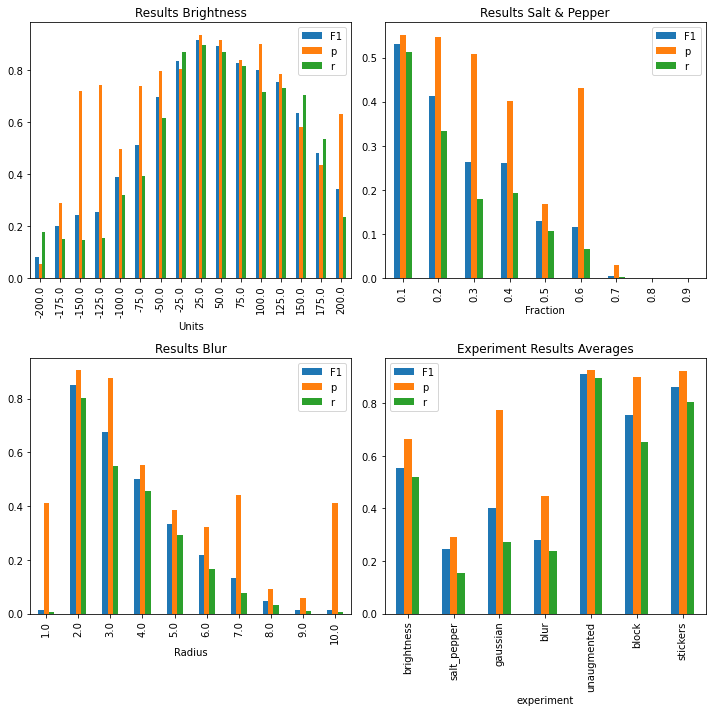

In [ ]:
avg = {
    "experiment": [],
    "p": [],
    "r": [],
    "F1": []
}
for key in exps.keys():
    if key == "avg": continue
    avg["experiment"].append(key)
    avg["p"].append(exps[key]["p"].mean())
    avg["r"].append(exps[key]["r"].mean())
    avg["F1"].append(exps[key]["F1"].mean())
avg_df = pd.DataFrame(avg)
exps["avg"] = avg_df

fig, axs = plt.subplots(2,2, figsize=(10,10))
keys = ["brightness", "salt_pepper", "blur", "avg"]
coordinates = [(0,0), (0,1), (1,0), (1,1)]
for i, key in enumerate(keys):
    df = exps[key]
    if i < 3:
        df.plot.bar(x="sort" ,y=["F1", "p", "r"], ax=axs[coordinates[i][0]][coordinates[i][1]])
    else:
        df.plot.bar(x="experiment" ,y=["F1", "p", "r"], ax=axs[coordinates[i][0]][coordinates[i][1]])
    

axs[0][0].set_title("Results Brightness")
axs[0][0].set_xlabel("Units")
axs[0][1].set_title("Results Salt & Pepper")
axs[0][1].set_xlabel("Fraction")
axs[1][0].set_title("Results Blur")
axs[1][0].set_xlabel("Radius")
axs[1][1].set_title("Experiment Results Averages")

fig.tight_layout()
fig.savefig("yolo_exps_results.pdf", bbox_inches="tight")
fig.show()


# resnet50

In [162]:
df = pd.read_csv("/home/leon/Documents/Studienarbeit/model_results/faster_rcnn_augmented/faster_rcnn_resnet_val.csv")
df

,Name,State,Notes,User,Tags,Created,Runtime,Sweep,architecture,AP_IoU=0.50,AP_IoU=0.50:0.95,AP_IoU=0.75,AR_IoU=0.50:0.95_maxDets=1,AR_IoU=0.50:0.95_maxDets=10,AR_IoU=0.50:0.95_maxDets=100
0,faster_r-cnn_resNet50_fpn_validate_GTSDB_stickers,finished,-,lkno0705,sticker,2022-04-13T10:38:13.000Z,23,NaN,CNN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,faster_r-cnn_resNet50_fpn_validate_GTSDB_block,finished,-,lkno0705,block,2022-04-11T16:59:50.000Z,28,NaN,CNN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,faster_r-cnn_resNet50_fpn_validate_GTSDB_200_b...,finished,-,lkno0705,brightness,2022-04-11T16:59:17.000Z,23,NaN,CNN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,faster_r-cnn_resNet50_fpn_validate_GTSDB_175_b...,finished,-,lkno0705,brightness,2022-04-11T16:58:47.000Z,23,NaN,CNN,0.000343,0.000092,0.000000,0.001681,0.011239,0.023739
4,faster_r-cnn_resNet50_fpn_validate_GTSDB_150_b...,finished,-,lkno0705,brightness,2022-04-11T16:58:17.000Z,23,NaN,CNN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,faster_r-cnn_resNet50_fpn_validate_GTSDB_125_b...,finished,-,lkno0705,brightness,2022-04-11T16:57:46.000Z,23,NaN,CNN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,faster_r-cnn_resNet50_fpn_validate_GTSDB_100_b...,finished,-,lkno0705,brightness,2022-04-11T16:57:14.000Z,23,NaN,CNN,0.000034,0.000003,0.000000,0.000000,0.000512,0.000512
7,faster_r-cnn_resNet50_fpn_validate_GTSDB_75_br...,finished,-,lkno0705,brightness,2022-04-11T16:56:42.000Z,23,NaN,CNN,0.000265,0.000050,0.000000,0.000490,0.005392,0.005392
8,faster_r-cnn_resNet50_fpn_validate_GTSDB_50_br...,finished,-,lkno0705,brightness,2022-04-11T16:56:10.000Z,23,NaN,CNN,0.000220,0.000039,0.000000,0.001433,0.003973,0.005845
9,faster_r-cnn_resNet50_fpn_validate_GTSDB_25_br...,finished,-,lkno0705,brightness,2022-04-11T16:55:38.000Z,23,NaN,CNN,0.002495,0.000283,0.000000,0.002451,0.007353,0.007353


In [ ]:
ext = df['Name'].str.findall('(-?\d+([.]\d+)?)')
ext

0                                              [(50, )]
1                                              [(50, )]
2                                     [(50, ), (200, )]
3                                     [(50, ), (175, )]
4                                     [(50, ), (150, )]
5                                     [(50, ), (125, )]
6                                     [(50, ), (100, )]
7                                      [(50, ), (75, )]
8                                      [(50, ), (50, )]
9                                      [(50, ), (25, )]
10                                    [(50, ), (-25, )]
11                                    [(50, ), (-50, )]
12                                    [(50, ), (-75, )]
13                                   [(50, ), (-100, )]
14                                   [(50, ), (-125, )]
15                                   [(50, ), (-150, )]
16                                   [(50, ), (-175, )]
17                                   [(50, ), (-

In [163]:
tags = df["Tags"].unique()
df["F1"] = 2 * ((df["AP_IoU=0.50"] * df["AR_IoU=0.50:0.95_maxDets=100"]) / (df["AP_IoU=0.50"] + df["AR_IoU=0.50:0.95_maxDets=100"]))
df["F1"].fillna(0, inplace=True)
df["Name"] = df["Name"].str.replace("50", "")
df['sort'] = df['Name'].str.extract('(-?\d+([.]\d+)?)', expand=False)[0].astype(float)
df.columns = df.columns.str.strip()
df['Name'] = df['Name'].str.strip()
df.sort_values(by=['Tags','sort'], inplace=True)
df.reset_index(drop=True, inplace=True)
df.rename(columns={"AP_IoU=0.50": "precision", "AR_IoU=0.50:0.95_maxDets=100": "recall"}, inplace=True)
df["sort"].fillna(0, inplace=True)
df["sort"] = df["sort"].round(1)
df

,Name,State,Notes,User,Tags,Created,Runtime,Sweep,architecture,precision,AP_IoU=0.50:0.95,AP_IoU=0.75,AR_IoU=0.50:0.95_maxDets=1,AR_IoU=0.50:0.95_maxDets=10,recall,F1,sort
0,faster_r-cnn_resNet_fpn_validate_GTSDB_block,finished,-,lkno0705,block,2022-04-11T16:59:50.000Z,28,NaN,CNN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,faster_r-cnn_resNet_fpn_validate_GTSDB_1_blur,finished,-,lkno0705,blur,2022-04-11T14:16:33.000Z,26,NaN,CNN,0.000473,0.000107,0.000048,0.003743,0.007732,0.012634,0.000911,1.0
2,faster_r-cnn_resNet_fpn_validate_GTSDB_2_blur,finished,-,lkno0705,blur,2022-04-11T14:18:30.000Z,23,NaN,CNN,0.001802,0.000397,0.000000,0.008479,0.011153,0.011153,0.003102,2.0
3,faster_r-cnn_resNet_fpn_validate_GTSDB_3_blur,finished,-,lkno0705,blur,2022-04-11T14:20:21.000Z,24,NaN,CNN,0.000794,0.000079,0.000000,0.000226,0.000679,0.000679,0.000732,3.0
4,faster_r-cnn_resNet_fpn_validate_GTSDB_4_blur,finished,-,lkno0705,blur,2022-04-11T14:22:07.000Z,22,NaN,CNN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.0
5,faster_r-cnn_resNet_fpn_validate_GTSDB_5_blur,finished,-,lkno0705,blur,2022-04-11T14:23:47.000Z,24,NaN,CNN,0.000946,0.000241,0.000000,0.002353,0.006275,0.006275,0.001644,5.0
6,faster_r-cnn_resNet_fpn_validate_GTSDB_6_blur,finished,-,lkno0705,blur,2022-04-11T14:25:27.000Z,23,NaN,CNN,0.004932,0.000990,0.000000,0.005882,0.005882,0.008824,0.006327,6.0
7,faster_r-cnn_resNet_fpn_validate_GTSDB_7_blur,finished,-,lkno0705,blur,2022-04-11T14:27:04.000Z,25,NaN,CNN,0.000333,0.000069,0.000002,0.004412,0.007353,0.011555,0.000647,7.0
8,faster_r-cnn_resNet_fpn_validate_GTSDB_8_blur,finished,-,lkno0705,blur,2022-04-11T14:28:42.000Z,23,NaN,CNN,0.002838,0.000420,0.000000,0.001584,0.009615,0.009615,0.004382,8.0
9,faster_r-cnn_resNet_fpn_validate_GTSDB_9_blur,finished,-,lkno0705,blur,2022-04-11T14:30:17.000Z,23,NaN,CNN,0.000065,0.000014,0.000000,0.000000,0.005882,0.008824,0.000129,9.0


In [164]:
idxs = [df.loc[(df["Tags"] == "brightness") & (df["sort"] == value)].index for value in [-1.0, 1.0, 0.0]]
for i in idxs:
    df.drop(i, inplace=True)
df

,Name,State,Notes,User,Tags,Created,Runtime,Sweep,architecture,precision,AP_IoU=0.50:0.95,AP_IoU=0.75,AR_IoU=0.50:0.95_maxDets=1,AR_IoU=0.50:0.95_maxDets=10,recall,F1,sort
0,faster_r-cnn_resNet_fpn_validate_GTSDB_block,finished,-,lkno0705,block,2022-04-11T16:59:50.000Z,28,NaN,CNN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,faster_r-cnn_resNet_fpn_validate_GTSDB_1_blur,finished,-,lkno0705,blur,2022-04-11T14:16:33.000Z,26,NaN,CNN,0.000473,0.000107,0.000048,0.003743,0.007732,0.012634,0.000911,1.0
2,faster_r-cnn_resNet_fpn_validate_GTSDB_2_blur,finished,-,lkno0705,blur,2022-04-11T14:18:30.000Z,23,NaN,CNN,0.001802,0.000397,0.000000,0.008479,0.011153,0.011153,0.003102,2.0
3,faster_r-cnn_resNet_fpn_validate_GTSDB_3_blur,finished,-,lkno0705,blur,2022-04-11T14:20:21.000Z,24,NaN,CNN,0.000794,0.000079,0.000000,0.000226,0.000679,0.000679,0.000732,3.0
4,faster_r-cnn_resNet_fpn_validate_GTSDB_4_blur,finished,-,lkno0705,blur,2022-04-11T14:22:07.000Z,22,NaN,CNN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.0
5,faster_r-cnn_resNet_fpn_validate_GTSDB_5_blur,finished,-,lkno0705,blur,2022-04-11T14:23:47.000Z,24,NaN,CNN,0.000946,0.000241,0.000000,0.002353,0.006275,0.006275,0.001644,5.0
6,faster_r-cnn_resNet_fpn_validate_GTSDB_6_blur,finished,-,lkno0705,blur,2022-04-11T14:25:27.000Z,23,NaN,CNN,0.004932,0.000990,0.000000,0.005882,0.005882,0.008824,0.006327,6.0
7,faster_r-cnn_resNet_fpn_validate_GTSDB_7_blur,finished,-,lkno0705,blur,2022-04-11T14:27:04.000Z,25,NaN,CNN,0.000333,0.000069,0.000002,0.004412,0.007353,0.011555,0.000647,7.0
8,faster_r-cnn_resNet_fpn_validate_GTSDB_8_blur,finished,-,lkno0705,blur,2022-04-11T14:28:42.000Z,23,NaN,CNN,0.002838,0.000420,0.000000,0.001584,0.009615,0.009615,0.004382,8.0
9,faster_r-cnn_resNet_fpn_validate_GTSDB_9_blur,finished,-,lkno0705,blur,2022-04-11T14:30:17.000Z,23,NaN,CNN,0.000065,0.000014,0.000000,0.000000,0.005882,0.008824,0.000129,9.0


In [165]:
groups = df.groupby("Tags")
groups.get_group("salt_pepper")

,Name,State,Notes,User,Tags,Created,Runtime,Sweep,architecture,precision,AP_IoU=0.50:0.95,AP_IoU=0.75,AR_IoU=0.50:0.95_maxDets=1,AR_IoU=0.50:0.95_maxDets=10,recall,F1,sort
29,faster_r-cnn_resNet_fpn_validate_GTSDB_0.1_sal...,finished,-,lkno0705,salt_pepper,2022-04-11T14:35:23.000Z,23,NaN,CNN,0.001236,0.000263,0.000086,0.000000,0.005707,0.005707,0.002031,0.1
30,faster_r-cnn_resNet_fpn_validate_GTSDB_0.2_sal...,finished,-,lkno0705,salt_pepper,2022-04-11T14:40:20.000Z,24,NaN,CNN,0.002591,0.000703,0.000127,0.010110,0.010951,0.010951,0.004191,0.2
31,faster_r-cnn_resNet_fpn_validate_GTSDB_0.30000...,finished,-,lkno0705,salt_pepper,2022-04-11T14:47:51.000Z,24,NaN,CNN,0.000115,0.000016,0.000000,0.000000,0.003620,0.008371,0.000227,0.3
32,faster_r-cnn_resNet_fpn_validate_GTSDB_0.4_sal...,finished,-,lkno0705,salt_pepper,2022-04-11T14:57:58.000Z,25,NaN,CNN,0.002086,0.000412,0.000000,0.003846,0.015385,0.015385,0.003674,0.4
33,faster_r-cnn_resNet_fpn_validate_GTSDB_0.5_sal...,finished,-,lkno0705,salt_pepper,2022-04-11T15:11:09.000Z,25,NaN,CNN,0.000025,0.000003,0.000000,0.000000,0.000490,0.000490,0.000048,0.5
34,faster_r-cnn_resNet_fpn_validate_GTSDB_0.60000...,finished,-,lkno0705,salt_pepper,2022-04-11T15:27:50.000Z,23,NaN,CNN,0.000175,0.000017,0.000000,0.000000,0.003922,0.003922,0.000335,0.6
35,faster_r-cnn_resNet_fpn_validate_GTSDB_0.70000...,finished,-,lkno0705,salt_pepper,2022-04-11T15:48:42.000Z,23,NaN,CNN,0.001725,0.000489,0.000000,0.003620,0.004525,0.004525,0.002498,0.7
36,faster_r-cnn_resNet_fpn_validate_GTSDB_0.8_sal...,finished,-,lkno0705,salt_pepper,2022-04-11T16:15:19.000Z,22,NaN,CNN,0.004734,0.000922,0.000000,0.003676,0.015441,0.015441,0.007247,0.8
37,faster_r-cnn_resNet_fpn_validate_GTSDB_0.9_sal...,finished,-,lkno0705,salt_pepper,2022-04-11T16:50:43.000Z,23,NaN,CNN,0.002912,0.000291,0.000000,0.000267,0.000267,0.000267,0.000490,0.9


In [166]:
avg = {
    "experiment": [],
    "precision": [],
    "recall": [],
    "F1": []
}
for tag in tags:
    avg["experiment"].append(tag)
    avg["precision"].append(groups.get_group(tag)["precision"].mean())
    avg["recall"].append(groups.get_group(tag)["recall"].mean())
    avg["F1"].append(groups.get_group(tag)["F1"].mean())
avg_df = pd.DataFrame(avg)
avg_df

,experiment,precision,recall,F1
0,sticker,0.000000,0.000000,0.000000
1,block,0.000000,0.000000,0.000000
2,brightness,0.000594,0.005730,0.000968
3,salt_pepper,0.001733,0.007229,0.002304
4,gaussian_noise,0.000000,0.000000,0.000000
5,blur,0.001218,0.006956,0.001787
6,reference,0.000253,0.006952,0.000487


/tmp/ipykernel_16116/826058402.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


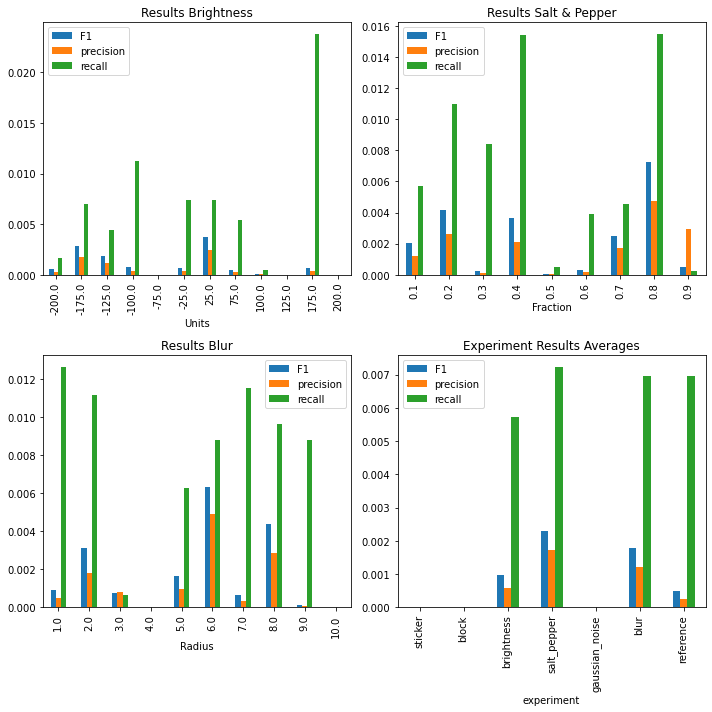

In [167]:
fig, axs = plt.subplots(2,2, figsize=(10,10))
coordinates = [(0,0), (0,1), (1,0), (1,1)]
keys = ["brightness", "salt_pepper", "blur", "avg"]
for i, key in enumerate(keys):
    if key == "avg":
        avg_df.plot.bar(x="experiment" ,y=["F1", "precision", "recall"], ax=axs[coordinates[i][0]][coordinates[i][1]])
    else:
        tmp_df = groups.get_group(key)
        tmp_df.plot.bar(x="sort" ,y=["F1", "precision", "recall"], ax=axs[coordinates[i][0]][coordinates[i][1]])

axs[0][0].set_title("Results Brightness")
axs[0][0].set_xlabel("Units")
axs[0][1].set_title("Results Salt & Pepper")
axs[0][1].set_xlabel("Fraction")
axs[1][0].set_title("Results Blur")
axs[1][0].set_xlabel("Radius")
axs[1][1].set_title("Experiment Results Averages")

fig.tight_layout()
fig.savefig("resnet_exps_results.pdf", bbox_inches="tight")
fig.show()

# mobilenet

In [ ]:
df = pd.read_csv("/home/leon/Documents/Studienarbeit/model_results/faster_rcnn_augmented/faster_rcnn_mobilenet_val.csv")
df

,Name,State,Notes,User,Tags,Created,Runtime,Sweep,architecture,AP_IoU=0.50,AP_IoU=0.50:0.95,AP_IoU=0.75,AR_IoU=0.50:0.95_maxDets=1,AR_IoU=0.50:0.95_maxDets=10,AR_IoU=0.50:0.95_maxDets=100
0,faster_r-cnn_mobilenet_v3_large_320_fpn_valida...,finished,-,lkno0705,sticker,2022-04-13T10:37:44.000Z,19,NaN,CNN,0.000000,0.000000,0,0.00000,0.000000,0.000000
1,faster_r-cnn_mobilenet_v3_large_320_fpn_valida...,finished,-,lkno0705,block,2022-04-11T11:40:04.000Z,18,NaN,CNN,0.000000,0.000000,0,0.00000,0.000000,0.000000
2,faster_r-cnn_mobilenet_v3_large_320_fpn_valida...,finished,-,lkno0705,brightness,2022-04-11T11:39:38.000Z,18,NaN,CNN,0.000000,0.000000,0,0.00000,0.000000,0.000000
3,faster_r-cnn_mobilenet_v3_large_320_fpn_valida...,finished,-,lkno0705,brightness,2022-04-11T11:39:13.000Z,18,NaN,CNN,0.000000,0.000000,0,0.00000,0.000000,0.000000
4,faster_r-cnn_mobilenet_v3_large_320_fpn_valida...,finished,-,lkno0705,brightness,2022-04-11T11:38:44.000Z,19,NaN,CNN,0.000000,0.000000,0,0.00000,0.000000,0.000000
5,faster_r-cnn_mobilenet_v3_large_320_fpn_valida...,finished,-,lkno0705,brightness,2022-04-11T11:38:18.000Z,18,NaN,CNN,0.000000,0.000000,0,0.00000,0.000000,0.000000
6,faster_r-cnn_mobilenet_v3_large_320_fpn_valida...,finished,-,lkno0705,brightness,2022-04-11T11:37:51.000Z,18,NaN,CNN,0.000000,0.000000,0,0.00000,0.000000,0.000000
7,faster_r-cnn_mobilenet_v3_large_320_fpn_valida...,finished,-,lkno0705,brightness,2022-04-11T11:37:25.000Z,18,NaN,CNN,0.000027,0.000003,0,0.00000,0.000420,0.000420
8,faster_r-cnn_mobilenet_v3_large_320_fpn_valida...,finished,-,lkno0705,brightness,2022-04-11T11:36:59.000Z,18,NaN,CNN,0.000000,0.000000,0,0.00000,0.000000,0.000000
9,faster_r-cnn_mobilenet_v3_large_320_fpn_valida...,finished,-,lkno0705,brightness,2022-04-11T11:36:31.000Z,19,NaN,CNN,0.000062,0.000006,0,0.00000,0.000184,0.000184


In [ ]:
tags = df["Tags"].unique()
df["F1"] = 2 * ((df["AP_IoU=0.50"] * df["AR_IoU=0.50:0.95_maxDets=100"]) / (df["AP_IoU=0.50"] + df["AR_IoU=0.50:0.95_maxDets=100"]))
df["F1"].fillna(0, inplace=True)
df["Name"] = df["Name"].str.replace("3|20", "")
df['sort'] = df['Name'].str.extract('(-?\d+([.]\d+)?)', expand=False)[0].astype(float)
df.columns = df.columns.str.strip()
df['Name'] = df['Name'].str.strip()
df.sort_values(by=['Tags','sort'], inplace=True)
df.reset_index(drop=True, inplace=True)
df.rename(columns={"AP_IoU=0.50": "precision", "AR_IoU=0.50:0.95_maxDets=100": "recall"}, inplace=True)
df["sort"].fillna(0, inplace=True)
df["sort"] = df["sort"].round(1)
df

/tmp/ipykernel_16116/1629558257.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Name"] = df["Name"].str.replace("3|20", "")


,Name,State,Notes,User,Tags,Created,Runtime,Sweep,architecture,precision,AP_IoU=0.50:0.95,AP_IoU=0.75,AR_IoU=0.50:0.95_maxDets=1,AR_IoU=0.50:0.95_maxDets=10,recall,F1,sort
0,faster_r-cnn_mobilenet_v_large__fpn_validate_G...,finished,-,lkno0705,block,2022-04-11T11:40:04.000Z,18,NaN,CNN,0.000000,0.000000,0,0.00000,0.000000,0.000000,0.000000,0.0
1,faster_r-cnn_mobilenet_v_large__fpn_validate_G...,finished,-,lkno0705,blur,2022-04-11T09:05:56.000Z,18,NaN,CNN,0.000000,0.000000,0,0.00000,0.000000,0.000000,0.000000,1.0
2,faster_r-cnn_mobilenet_v_large__fpn_validate_G...,finished,-,lkno0705,blur,2022-04-11T09:07:44.000Z,19,NaN,CNN,0.000000,0.000000,0,0.00000,0.000000,0.000000,0.000000,2.0
3,faster_r-cnn_mobilenet_v_large__fpn_validate_G...,finished,-,lkno0705,blur,2022-04-11T09:11:07.000Z,18,NaN,CNN,0.000000,0.000000,0,0.00000,0.000000,0.000000,0.000000,4.0
4,faster_r-cnn_mobilenet_v_large__fpn_validate_G...,finished,-,lkno0705,blur,2022-04-11T09:12:43.000Z,18,NaN,CNN,0.000000,0.000000,0,0.00000,0.000000,0.000000,0.000000,5.0
5,faster_r-cnn_mobilenet_v_large__fpn_validate_G...,finished,-,lkno0705,blur,2022-04-11T09:14:17.000Z,17,NaN,CNN,0.000000,0.000000,0,0.00000,0.000000,0.000000,0.000000,6.0
6,faster_r-cnn_mobilenet_v_large__fpn_validate_G...,finished,-,lkno0705,blur,2022-04-11T09:15:48.000Z,18,NaN,CNN,0.000000,0.000000,0,0.00000,0.000000,0.000000,0.000000,7.0
7,faster_r-cnn_mobilenet_v_large__fpn_validate_G...,finished,-,lkno0705,blur,2022-04-11T09:17:18.000Z,18,NaN,CNN,0.000000,0.000000,0,0.00000,0.000000,0.000000,0.000000,8.0
8,faster_r-cnn_mobilenet_v_large__fpn_validate_G...,finished,-,lkno0705,blur,2022-04-11T09:18:47.000Z,18,NaN,CNN,0.000000,0.000000,0,0.00000,0.000000,0.000000,0.000000,9.0
9,faster_r-cnn_mobilenet_v_large__fpn_validate_G...,finished,-,lkno0705,blur,2022-04-11T09:20:16.000Z,18,NaN,CNN,0.003094,0.000309,0,0.00049,0.001961,0.001961,0.002400,10.0


In [ ]:
idxs = [df.loc[(df["Tags"] == "brightness") & (df["sort"] == value)].index for value in [0.0]]
idxs = idxs + [df.loc[(df["Tags"] == "blur") & (df["sort"] == value)].index for value in [0.0]]
idxs = idxs + [df.loc[(df["Tags"] == "salt_pepper") & (df["sort"] == value)].index for value in [0.0]]
print(idxs)
for i in idxs:
    df.drop(i, inplace=True)
df

[Int64Index([18, 19], dtype='int64'), Int64Index([10], dtype='int64'), Int64Index([29], dtype='int64')]


,Name,State,Notes,User,Tags,Created,Runtime,Sweep,architecture,precision,AP_IoU=0.50:0.95,AP_IoU=0.75,AR_IoU=0.50:0.95_maxDets=1,AR_IoU=0.50:0.95_maxDets=10,recall,F1,sort
0,faster_r-cnn_mobilenet_v_large__fpn_validate_G...,finished,-,lkno0705,block,2022-04-11T11:40:04.000Z,18,NaN,CNN,0.000000,0.000000,0,0.00000,0.000000,0.000000,0.000000,0.0
1,faster_r-cnn_mobilenet_v_large__fpn_validate_G...,finished,-,lkno0705,blur,2022-04-11T09:05:56.000Z,18,NaN,CNN,0.000000,0.000000,0,0.00000,0.000000,0.000000,0.000000,1.0
2,faster_r-cnn_mobilenet_v_large__fpn_validate_G...,finished,-,lkno0705,blur,2022-04-11T09:07:44.000Z,19,NaN,CNN,0.000000,0.000000,0,0.00000,0.000000,0.000000,0.000000,2.0
3,faster_r-cnn_mobilenet_v_large__fpn_validate_G...,finished,-,lkno0705,blur,2022-04-11T09:11:07.000Z,18,NaN,CNN,0.000000,0.000000,0,0.00000,0.000000,0.000000,0.000000,4.0
4,faster_r-cnn_mobilenet_v_large__fpn_validate_G...,finished,-,lkno0705,blur,2022-04-11T09:12:43.000Z,18,NaN,CNN,0.000000,0.000000,0,0.00000,0.000000,0.000000,0.000000,5.0
5,faster_r-cnn_mobilenet_v_large__fpn_validate_G...,finished,-,lkno0705,blur,2022-04-11T09:14:17.000Z,17,NaN,CNN,0.000000,0.000000,0,0.00000,0.000000,0.000000,0.000000,6.0
6,faster_r-cnn_mobilenet_v_large__fpn_validate_G...,finished,-,lkno0705,blur,2022-04-11T09:15:48.000Z,18,NaN,CNN,0.000000,0.000000,0,0.00000,0.000000,0.000000,0.000000,7.0
7,faster_r-cnn_mobilenet_v_large__fpn_validate_G...,finished,-,lkno0705,blur,2022-04-11T09:17:18.000Z,18,NaN,CNN,0.000000,0.000000,0,0.00000,0.000000,0.000000,0.000000,8.0
8,faster_r-cnn_mobilenet_v_large__fpn_validate_G...,finished,-,lkno0705,blur,2022-04-11T09:18:47.000Z,18,NaN,CNN,0.000000,0.000000,0,0.00000,0.000000,0.000000,0.000000,9.0
9,faster_r-cnn_mobilenet_v_large__fpn_validate_G...,finished,-,lkno0705,blur,2022-04-11T09:20:16.000Z,18,NaN,CNN,0.003094,0.000309,0,0.00049,0.001961,0.001961,0.002400,10.0


In [ ]:
groups = df.groupby("Tags")
groups.get_group("salt_pepper")

,Name,State,Notes,User,Tags,Created,Runtime,Sweep,architecture,precision,AP_IoU=0.50:0.95,AP_IoU=0.75,AR_IoU=0.50:0.95_maxDets=1,AR_IoU=0.50:0.95_maxDets=10,recall,F1,sort
30,faster_r-cnn_mobilenet_v_large__fpn_validate_G...,finished,-,lkno0705,salt_pepper,2022-04-11T09:23:23.000Z,18,NaN,CNN,0.000000,0.000000,0,0.00000,0.00000,0.00000,0.000000,0.1
31,faster_r-cnn_mobilenet_v_large__fpn_validate_G...,finished,-,lkno0705,salt_pepper,2022-04-11T09:28:01.000Z,18,NaN,CNN,0.000000,0.000000,0,0.00000,0.00000,0.00000,0.000000,0.2
32,faster_r-cnn_mobilenet_v_large__fpn_validate_G...,finished,-,lkno0705,salt_pepper,2022-04-11T09:44:34.000Z,17,NaN,CNN,0.000000,0.000000,0,0.00000,0.00000,0.00000,0.000000,0.4
33,faster_r-cnn_mobilenet_v_large__fpn_validate_G...,finished,-,lkno0705,salt_pepper,2022-04-11T09:57:05.000Z,18,NaN,CNN,0.000000,0.000000,0,0.00000,0.00000,0.00000,0.000000,0.5
34,faster_r-cnn_mobilenet_v_large__fpn_validate_G...,finished,-,lkno0705,salt_pepper,2022-04-11T10:12:53.000Z,18,NaN,CNN,0.000655,0.000131,0,0.00049,0.00049,0.00049,0.000561,0.6
35,faster_r-cnn_mobilenet_v_large__fpn_validate_G...,finished,-,lkno0705,salt_pepper,2022-04-11T10:32:54.000Z,19,NaN,CNN,0.000000,0.000000,0,0.00000,0.00000,0.00000,0.000000,0.7
36,faster_r-cnn_mobilenet_v_large__fpn_validate_G...,finished,-,lkno0705,salt_pepper,2022-04-11T10:58:26.000Z,18,NaN,CNN,0.000000,0.000000,0,0.00000,0.00000,0.00000,0.000000,0.8
37,faster_r-cnn_mobilenet_v_large__fpn_validate_G...,finished,-,lkno0705,salt_pepper,2022-04-11T11:32:27.000Z,18,NaN,CNN,0.000000,0.000000,0,0.00000,0.00000,0.00000,0.000000,0.9


In [ ]:
avg = {
    "experiment": [],
    "precision": [],
    "recall": [],
    "F1": []
}
for tag in tags:
    avg["experiment"].append(tag)
    avg["precision"].append(groups.get_group(tag)["precision"].mean())
    avg["recall"].append(groups.get_group(tag)["recall"].mean())
    avg["F1"].append(groups.get_group(tag)["F1"].mean())
avg_df = pd.DataFrame(avg)
avg_df

,experiment,precision,recall,F1
0,sticker,0.000000,0.000000,0.000000
1,block,0.000000,0.000000,0.000000
2,brightness,0.000055,0.000148,0.000074
3,salt_pepper,0.000082,0.000061,0.000070
4,gaussian_noise,0.000000,0.000000,0.000000
5,blur,0.000344,0.000218,0.000267
6,ref,0.000000,0.000000,0.000000


/tmp/ipykernel_16116/60710692.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


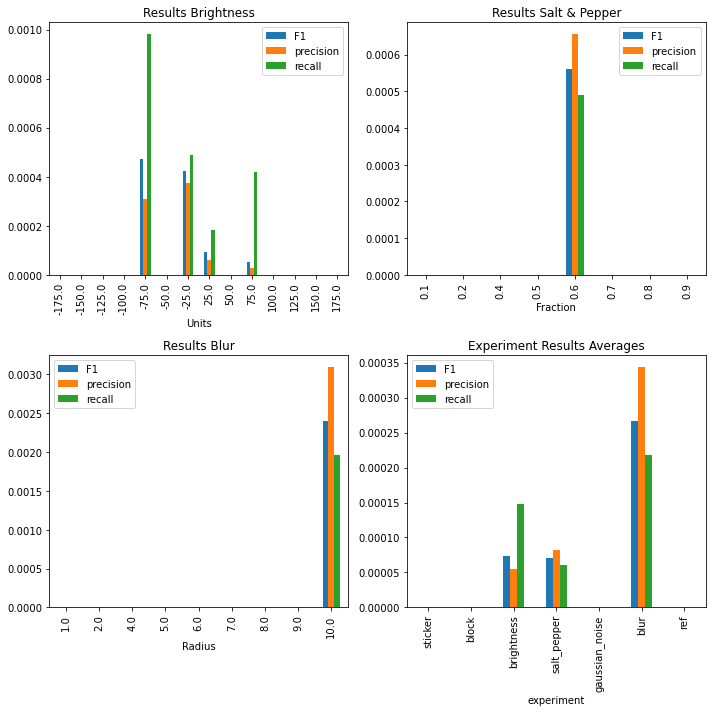

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(10,10))
coordinates = [(0,0), (0,1), (1,0), (1,1)]
keys = ["brightness", "salt_pepper", "blur", "avg"]
for i, key in enumerate(keys):
    if key == "avg":
        avg_df.plot.bar(x="experiment" ,y=["F1", "precision", "recall"], ax=axs[coordinates[i][0]][coordinates[i][1]])
    else:
        tmp_df = groups.get_group(key)
        tmp_df.plot.bar(x="sort" ,y=["F1", "precision", "recall"], ax=axs[coordinates[i][0]][coordinates[i][1]])

axs[0][0].set_title("Results Brightness")
axs[0][0].set_xlabel("Units")
axs[0][1].set_title("Results Salt & Pepper")
axs[0][1].set_xlabel("Fraction")
axs[1][0].set_title("Results Blur")
axs[1][0].set_xlabel("Radius")
axs[1][1].set_title("Experiment Results Averages")

fig.tight_layout()
fig.savefig("mobileNet_exps_results.pdf", bbox_inches="tight")
fig.show()

# Modell Auswahl

## Yolo

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [20]:
dfs = [
    pd.read_csv("/home/leon/Documents/Studienarbeit/model_results/f1-yolo-gtsdb.csv"),
    pd.read_csv("/home/leon/Documents/Studienarbeit/model_results/recall-yolo-gtsdb.csv"),
    pd.read_csv("/home/leon/Documents/Studienarbeit/model_results/map50-yolo-gtsdb.csv")
]

dfs[2]

,Step,e100-yolov5m-random-init-gtsdb - metrics/mAP_0.5,e100-yolov5m-random-init-gtsdb - metrics/mAP_0.5__MIN,e100-yolov5m-random-init-gtsdb - metrics/mAP_0.5__MAX,e100-yolov5m-gtsrb-transfer-gtsdb - metrics/mAP_0.5,e100-yolov5m-gtsrb-transfer-gtsdb - metrics/mAP_0.5__MIN,e100-yolov5m-gtsrb-transfer-gtsdb - metrics/mAP_0.5__MAX,e100-yolov5s-coco-transfer-gtsdb - metrics/mAP_0.5,e100-yolov5s-coco-transfer-gtsdb - metrics/mAP_0.5__MIN,e100-yolov5s-coco-transfer-gtsdb - metrics/mAP_0.5__MAX,e100-yolov5m-coco-transfer-gtsdb - metrics/mAP_0.5,e100-yolov5m-coco-transfer-gtsdb - metrics/mAP_0.5__MIN,e100-yolov5m-coco-transfer-gtsdb - metrics/mAP_0.5__MAX
0,0,0.000000,0.000000,0.000000,0.359055,0.359055,0.359055,0.000102,0.000102,0.000102,0.000927,0.000927,0.000927
1,1,0.000000,0.000000,0.000000,0.580850,0.580850,0.580850,0.000285,0.000285,0.000285,0.025353,0.025353,0.025353
2,2,0.000000,0.000000,0.000000,0.661445,0.661445,0.661445,0.015627,0.015627,0.015627,0.038606,0.038606,0.038606
3,3,0.000000,0.000000,0.000000,0.683673,0.683673,0.683673,0.017192,0.017192,0.017192,0.019848,0.019848,0.019848
4,4,0.000000,0.000000,0.000000,0.638156,0.638156,0.638156,0.050321,0.050321,0.050321,0.036847,0.036847,0.036847
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,96,0.186450,0.186450,0.186450,0.831891,0.831891,0.831891,0.326061,0.326061,0.326061,0.419556,0.419556,0.419556
97,97,0.182845,0.182845,0.182845,0.826587,0.826587,0.826587,0.330858,0.330858,0.330858,0.418428,0.418428,0.418428
98,98,0.190835,0.190835,0.190835,0.829800,0.829800,0.829800,0.327934,0.327934,0.327934,0.428073,0.428073,0.428073
99,99,0.197139,0.197139,0.197139,0.823651,0.823651,0.823651,0.331865,0.331865,0.331865,0.436257,0.436257,0.436257


In [21]:
for df in dfs:
    df.set_index("Step", inplace=True)
dfs[1]

,e100-yolov5m-random-init-gtsdb - metrics/recall,e100-yolov5m-random-init-gtsdb - metrics/recall__MIN,e100-yolov5m-random-init-gtsdb - metrics/recall__MAX,e100-yolov5m-gtsrb-transfer-gtsdb - metrics/recall,e100-yolov5m-gtsrb-transfer-gtsdb - metrics/recall__MIN,e100-yolov5m-gtsrb-transfer-gtsdb - metrics/recall__MAX,e100-yolov5s-coco-transfer-gtsdb - metrics/recall,e100-yolov5s-coco-transfer-gtsdb - metrics/recall__MIN,e100-yolov5s-coco-transfer-gtsdb - metrics/recall__MAX,e100-yolov5m-coco-transfer-gtsdb - metrics/recall,e100-yolov5m-coco-transfer-gtsdb - metrics/recall__MIN,e100-yolov5m-coco-transfer-gtsdb - metrics/recall__MAX
Step,,,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.273777,0.273777,0.273777,0.003676,0.003676,0.003676,0.006653,0.006653,0.006653
1,0.000000,0.000000,0.000000,0.437467,0.437467,0.437467,0.003268,0.003268,0.003268,0.242095,0.242095,0.242095
2,0.000000,0.000000,0.000000,0.536668,0.536668,0.536668,0.152174,0.152174,0.152174,0.199070,0.199070,0.199070
3,0.000000,0.000000,0.000000,0.609875,0.609875,0.609875,0.261554,0.261554,0.261554,0.026494,0.026494,0.026494
4,0.000000,0.000000,0.000000,0.530936,0.530936,0.530936,0.056381,0.056381,0.056381,0.131735,0.131735,0.131735
...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.419881,0.419881,0.419881,0.729569,0.729569,0.729569,0.323319,0.323319,0.323319,0.398518,0.398518,0.398518
97,0.436990,0.436990,0.436990,0.721204,0.721204,0.721204,0.314703,0.314703,0.314703,0.403875,0.403875,0.403875
98,0.439951,0.439951,0.439951,0.713580,0.713580,0.713580,0.307492,0.307492,0.307492,0.395366,0.395366,0.395366


In [8]:
columns_to_drop = [x for x in dfs[0].columns if "_MIN" in x or "_MAX" in x]
columns_to_drop

['e100-yolov5m-random-init-gtsdb F1-Score__MIN',
 'e100-yolov5m-random-init-gtsdb F1-Score__MAX',
 'e100-yolov5m-gtsrb-transfer-gtsdb F1-Score__MIN',
 'e100-yolov5m-gtsrb-transfer-gtsdb F1-Score__MAX',
 'e100-yolov5s-coco-transfer-gtsdb F1-Score__MIN',
 'e100-yolov5s-coco-transfer-gtsdb F1-Score__MAX',
 'e100-yolov5m-coco-transfer-gtsdb F1-Score__MIN',
 'e100-yolov5m-coco-transfer-gtsdb F1-Score__MAX']

In [22]:
for df in dfs:
    columns_to_drop = [x for x in df.columns if "_MIN" in x or "_MAX" in x]
    df.drop(columns=columns_to_drop, inplace=True)
dfs[0]

,e100-yolov5m-random-init-gtsdb F1-Score,e100-yolov5m-gtsrb-transfer-gtsdb F1-Score,e100-yolov5s-coco-transfer-gtsdb F1-Score,e100-yolov5m-coco-transfer-gtsdb F1-Score
Step,,,,
0,0.000000,0.568936,0.001902,0.004149
1,0.000000,0.578785,0.001844,0.127410
2,0.000000,0.627962,0.080812,0.198334
3,0.000000,0.639775,0.149911,0.307427
4,0.000000,0.578551,0.386400,0.135207
...,...,...,...,...
96,0.379268,0.785017,0.535271,0.591516
97,0.387623,0.783545,0.533112,0.593744
98,0.393646,0.789352,0.528592,0.590680


In [24]:
dfs[1]

,e100-yolov5m-random-init-gtsdb - metrics/recall,e100-yolov5m-gtsrb-transfer-gtsdb - metrics/recall,e100-yolov5s-coco-transfer-gtsdb - metrics/recall,e100-yolov5m-coco-transfer-gtsdb - metrics/recall
Step,,,,
0,0.000000,0.273777,0.003676,0.006653
1,0.000000,0.437467,0.003268,0.242095
2,0.000000,0.536668,0.152174,0.199070
3,0.000000,0.609875,0.261554,0.026494
4,0.000000,0.530936,0.056381,0.131735
...,...,...,...,...
96,0.419881,0.729569,0.323319,0.398518
97,0.436990,0.721204,0.314703,0.403875
98,0.439951,0.713580,0.307492,0.395366


In [25]:
dfs[2]

,e100-yolov5m-random-init-gtsdb - metrics/mAP_0.5,e100-yolov5m-gtsrb-transfer-gtsdb - metrics/mAP_0.5,e100-yolov5s-coco-transfer-gtsdb - metrics/mAP_0.5,e100-yolov5m-coco-transfer-gtsdb - metrics/mAP_0.5
Step,,,,
0,0.000000,0.359055,0.000102,0.000927
1,0.000000,0.580850,0.000285,0.025353
2,0.000000,0.661445,0.015627,0.038606
3,0.000000,0.683673,0.017192,0.019848
4,0.000000,0.638156,0.050321,0.036847
...,...,...,...,...
96,0.186450,0.831891,0.326061,0.419556
97,0.182845,0.826587,0.330858,0.418428
98,0.190835,0.829800,0.327934,0.428073


In [29]:
for df in dfs:
    columns = [x.split(" ")[0] for x in df.columns]
    print(columns)
    df.columns = columns
dfs[0]

['e100-yolov5m-random-init-gtsdb', 'e100-yolov5m-gtsrb-transfer-gtsdb', 'e100-yolov5s-coco-transfer-gtsdb', 'e100-yolov5m-coco-transfer-gtsdb']
['e100-yolov5m-random-init-gtsdb', 'e100-yolov5m-gtsrb-transfer-gtsdb', 'e100-yolov5s-coco-transfer-gtsdb', 'e100-yolov5m-coco-transfer-gtsdb']
['e100-yolov5m-random-init-gtsdb', 'e100-yolov5m-gtsrb-transfer-gtsdb', 'e100-yolov5s-coco-transfer-gtsdb', 'e100-yolov5m-coco-transfer-gtsdb']


,e100-yolov5m-random-init-gtsdb,e100-yolov5m-gtsrb-transfer-gtsdb,e100-yolov5s-coco-transfer-gtsdb,e100-yolov5m-coco-transfer-gtsdb
Step,,,,
0,0.000000,0.568936,0.001902,0.004149
1,0.000000,0.578785,0.001844,0.127410
2,0.000000,0.627962,0.080812,0.198334
3,0.000000,0.639775,0.149911,0.307427
4,0.000000,0.578551,0.386400,0.135207
...,...,...,...,...
96,0.379268,0.785017,0.535271,0.591516
97,0.387623,0.783545,0.533112,0.593744
98,0.393646,0.789352,0.528592,0.590680


In [30]:
dfs[1]

,e100-yolov5m-random-init-gtsdb,e100-yolov5m-gtsrb-transfer-gtsdb,e100-yolov5s-coco-transfer-gtsdb,e100-yolov5m-coco-transfer-gtsdb
Step,,,,
0,0.000000,0.273777,0.003676,0.006653
1,0.000000,0.437467,0.003268,0.242095
2,0.000000,0.536668,0.152174,0.199070
3,0.000000,0.609875,0.261554,0.026494
4,0.000000,0.530936,0.056381,0.131735
...,...,...,...,...
96,0.419881,0.729569,0.323319,0.398518
97,0.436990,0.721204,0.314703,0.403875
98,0.439951,0.713580,0.307492,0.395366


In [31]:
dfs[2]

,e100-yolov5m-random-init-gtsdb,e100-yolov5m-gtsrb-transfer-gtsdb,e100-yolov5s-coco-transfer-gtsdb,e100-yolov5m-coco-transfer-gtsdb
Step,,,,
0,0.000000,0.359055,0.000102,0.000927
1,0.000000,0.580850,0.000285,0.025353
2,0.000000,0.661445,0.015627,0.038606
3,0.000000,0.683673,0.017192,0.019848
4,0.000000,0.638156,0.050321,0.036847
...,...,...,...,...
96,0.186450,0.831891,0.326061,0.419556
97,0.182845,0.826587,0.330858,0.418428
98,0.190835,0.829800,0.327934,0.428073


/tmp/ipykernel_3638/2646289983.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


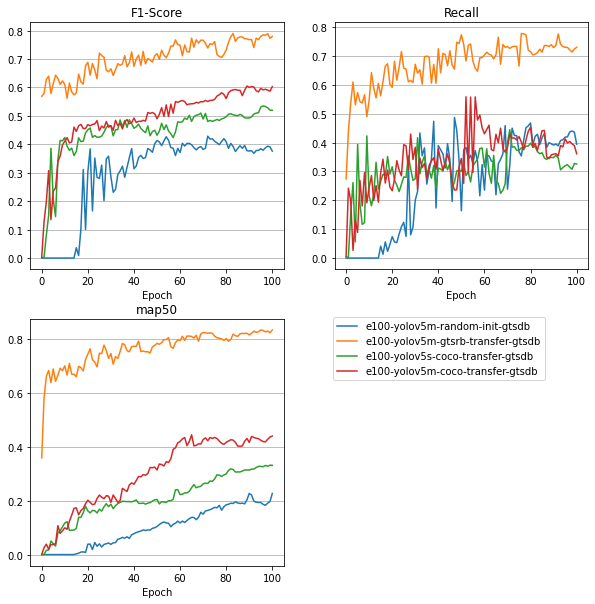

In [78]:
fig, axs = plt.subplots(2,2, figsize=(10,10))
mapping = [axs[0,0],axs[0,1], axs[1,0]]
for i, df in enumerate(dfs):
    mapping[i] = df.plot(ax=mapping[i], legend=False)
    mapping[i].set_xlabel("Epoch")
    mapping[i].grid(axis="y")

axs[0,0].set_title("F1-Score")
axs[0,1].set_title("Recall")
axs[1,0].set_title("map50")
axs[1,1].axis('off')
handles, labels = axs[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc=(0.56,0.37))
fig.savefig("yolo-gtsdb-train.pdf")
fig.show()

## yolo gtsrb

In [79]:
df = pd.read_csv("/home/leon/Documents/Studienarbeit/model_results/f1-yolo-gtsrb.csv")
df

,Step,e100-yolov5m-random-init-gtsrb F1-Score,e100-yolov5m-random-init-gtsrb F1-Score__MIN,e100-yolov5m-random-init-gtsrb F1-Score__MAX,e100-yolov5m-coco-transfer-gtsrb F1-Score,e100-yolov5m-coco-transfer-gtsrb F1-Score__MIN,e100-yolov5m-coco-transfer-gtsrb F1-Score__MAX
0,0,0.346166,0.136236,0.556095,0.523943,0.437288,0.610597
1,1,0.450614,0.333592,0.567636,0.632792,0.586787,0.678796
2,2,0.515201,0.351788,0.678614,0.666027,0.618863,0.713191
3,3,0.553580,0.528296,0.578865,0.822781,0.806637,0.838926
4,4,0.654843,0.638303,0.671383,0.868490,0.825305,0.911675
...,...,...,...,...,...,...,...
96,96,0.957264,0.955288,0.959240,0.952176,0.948666,0.955686
97,97,0.957313,0.955432,0.959195,0.952272,0.947650,0.956893
98,98,0.956631,0.955310,0.957953,0.953156,0.949134,0.957179
99,99,0.956246,0.954265,0.958228,0.953328,0.950479,0.956178


In [80]:
df.set_index("Step", inplace=True)

In [81]:
columns_to_drop = [x for x in df.columns if "_MIN" in x or "_MAX" in x]
df.drop(columns=columns_to_drop, inplace=True)
df

,e100-yolov5m-random-init-gtsrb F1-Score,e100-yolov5m-coco-transfer-gtsrb F1-Score
Step,,
0,0.346166,0.523943
1,0.450614,0.632792
2,0.515201,0.666027
3,0.553580,0.822781
4,0.654843,0.868490
...,...,...
96,0.957264,0.952176
97,0.957313,0.952272
98,0.956631,0.953156


In [82]:
columns = [x.split(" ")[0] for x in df.columns]
print(columns)
df.columns = columns
df

['e100-yolov5m-random-init-gtsrb', 'e100-yolov5m-coco-transfer-gtsrb']


,e100-yolov5m-random-init-gtsrb,e100-yolov5m-coco-transfer-gtsrb
Step,,
0,0.346166,0.523943
1,0.450614,0.632792
2,0.515201,0.666027
3,0.553580,0.822781
4,0.654843,0.868490
...,...,...
96,0.957264,0.952176
97,0.957313,0.952272
98,0.956631,0.953156


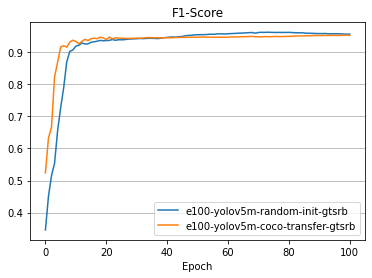

In [83]:
df.plot()
plt.xlabel("Epoch")
plt.title("F1-Score")
plt.grid(axis="y")
plt.savefig("yolo-gtsrb-train.pdf")
plt.show()

## Faster-R-CNN
### MobileNet

In [149]:
dfs = [
    pd.read_csv("/home/leon/Documents/Studienarbeit/model_results/mobileNet-F1-all.csv"),
    pd.read_csv("/home/leon/Documents/Studienarbeit/model_results/mobileNet-aP-all.csv"),
    pd.read_csv("/home/leon/Documents/Studienarbeit/model_results/mobileNet-recall-all.csv")
]
dfs[0]

,Step,faster_r-cnn_mobileNet_train_GTSDB_10Epochs - AP_IoU=0.50,faster_r-cnn_mobileNet_train_GTSDB_10Epochs - AP_IoU=0.50__MIN,faster_r-cnn_mobileNet_train_GTSDB_10Epochs - AP_IoU=0.50__MAX,faster_r-cnn_mobileNet_train_GTSDB_10Epochs - AR_IoU=0.50:0.95_maxDets=100,faster_r-cnn_mobileNet_train_GTSDB_10Epochs - AR_IoU=0.50:0.95_maxDets=100__MIN,faster_r-cnn_mobileNet_train_GTSDB_10Epochs - AR_IoU=0.50:0.95_maxDets=100__MAX,faster_r-cnn_mobileNet_COCO-transfer_GTSDB_10Epochs - AP_IoU=0.50,faster_r-cnn_mobileNet_COCO-transfer_GTSDB_10Epochs - AP_IoU=0.50__MIN,faster_r-cnn_mobileNet_COCO-transfer_GTSDB_10Epochs - AP_IoU=0.50__MAX,...,faster_r-cnn_mobileNet_random-init_GTSDB_10Epochs - AP_IoU=0.50__MAX,faster_r-cnn_mobileNet_random-init_GTSDB_10Epochs - AR_IoU=0.50:0.95_maxDets=100,faster_r-cnn_mobileNet_random-init_GTSDB_10Epochs - AR_IoU=0.50:0.95_maxDets=100__MIN,faster_r-cnn_mobileNet_random-init_GTSDB_10Epochs - AR_IoU=0.50:0.95_maxDets=100__MAX,faster_r-cnn_mobileNet_COCO-transfer_GTSRB_10Epochs - AP_IoU=0.50,faster_r-cnn_mobileNet_COCO-transfer_GTSRB_10Epochs - AP_IoU=0.50__MIN,faster_r-cnn_mobileNet_COCO-transfer_GTSRB_10Epochs - AP_IoU=0.50__MAX,faster_r-cnn_mobileNet_COCO-transfer_GTSRB_10Epochs - AR_IoU=0.50:0.95_maxDets=100,faster_r-cnn_mobileNet_COCO-transfer_GTSRB_10Epochs - AR_IoU=0.50:0.95_maxDets=100__MIN,faster_r-cnn_mobileNet_COCO-transfer_GTSRB_10Epochs - AR_IoU=0.50:0.95_maxDets=100__MAX
0,1,0,0,0,0,0,0,0.000000,0.000000,0.000000,...,0,0,0,0,0.945568,0.945568,0.945568,0.853167,0.853167,0.853167
1,3,0,0,0,0,0,0,0.000000,0.000000,0.000000,...,0,0,0,0,0.999513,0.999513,0.999513,0.858390,0.858390,0.858390
2,5,0,0,0,0,0,0,0.024543,0.024543,0.024543,...,0,0,0,0,1.000000,1.000000,1.000000,0.869597,0.869597,0.869597
3,7,0,0,0,0,0,0,0.029566,0.029566,0.029566,...,0,0,0,0,1.000000,1.000000,1.000000,0.962020,0.962020,0.962020
4,9,0,0,0,0,0,0,0.041602,0.041602,0.041602,...,0,0,0,0,1.000000,1.000000,1.000000,0.964810,0.964810,0.964810
5,11,0,0,0,0,0,0,0.070400,0.070400,0.070400,...,0,0,0,0,1.000000,1.000000,1.000000,0.966349,0.966349,0.966349
6,13,0,0,0,0,0,0,0.070760,0.070760,0.070760,...,0,0,0,0,1.000000,1.000000,1.000000,0.972650,0.972650,0.972650
7,15,0,0,0,0,0,0,0.070422,0.070422,0.070422,...,0,0,0,0,1.000000,1.000000,1.000000,0.972779,0.972779,0.972779
8,17,0,0,0,0,0,0,0.070133,0.070133,0.070133,...,0,0,0,0,1.000000,1.000000,1.000000,0.973039,0.973039,0.973039
9,19,0,0,0,0,0,0,0.070133,0.070133,0.070133,...,0,0,0,0,1.000000,1.000000,1.000000,0.972717,0.972717,0.972717


In [150]:
for df in dfs:
    columns_to_drop = [x for x in df.columns if "_MIN" in x or "_MAX" in x]
    df.drop(columns=columns_to_drop, inplace=True)
    df.drop(columns=["Step"], inplace=True)
dfs[0]

,faster_r-cnn_mobileNet_train_GTSDB_10Epochs - AP_IoU=0.50,faster_r-cnn_mobileNet_train_GTSDB_10Epochs - AR_IoU=0.50:0.95_maxDets=100,faster_r-cnn_mobileNet_COCO-transfer_GTSDB_10Epochs - AP_IoU=0.50,faster_r-cnn_mobileNet_COCO-transfer_GTSDB_10Epochs - AR_IoU=0.50:0.95_maxDets=100,faster_r-cnn_mobileNet_random-init_GTSRB_10Epochs - AP_IoU=0.50,faster_r-cnn_mobileNet_random-init_GTSRB_10Epochs - AR_IoU=0.50:0.95_maxDets=100,faster_r-cnn_mobileNet_random-init_GTSDB_10Epochs - AP_IoU=0.50,faster_r-cnn_mobileNet_random-init_GTSDB_10Epochs - AR_IoU=0.50:0.95_maxDets=100,faster_r-cnn_mobileNet_COCO-transfer_GTSRB_10Epochs - AP_IoU=0.50,faster_r-cnn_mobileNet_COCO-transfer_GTSRB_10Epochs - AR_IoU=0.50:0.95_maxDets=100
0,0,0,0.000000,0.000000,0.959062,0.835344,0,0,0.945568,0.853167
1,0,0,0.000000,0.000000,0.999973,0.850137,0,0,0.999513,0.858390
2,0,0,0.024543,0.015918,1.000000,0.867677,0,0,1.000000,0.869597
3,0,0,0.029566,0.022330,1.000000,0.961630,0,0,1.000000,0.962020
4,0,0,0.041602,0.034749,1.000000,0.964140,0,0,1.000000,0.964810
5,0,0,0.070400,0.059602,1.000000,0.965278,0,0,1.000000,0.966349
6,0,0,0.070760,0.060140,1.000000,0.972547,0,0,1.000000,0.972650
7,0,0,0.070422,0.060812,1.000000,0.972800,0,0,1.000000,0.972779
8,0,0,0.070133,0.061369,1.000000,0.973113,0,0,1.000000,0.973039
9,0,0,0.070133,0.061369,1.000000,0.972977,0,0,1.000000,0.972717


In [151]:
for df in dfs:
    df.rename(columns={"faster_r-cnn_mobileNet_train_GTSDB_10Epochs - AR_IoU=0.50:0.95_maxDets=100": "faster_r-cnn_mobileNet_GTSRB-transfer_GTSDB_10Epochs - AR_IoU=0.50:0.95_maxDets=100", "faster_r-cnn_mobileNet_train_GTSDB_10Epochs - AP_IoU=0.50": "faster_r-cnn_mobileNet_GTSRB-transfer_GTSDB_10Epochs - AP_IoU=0.50"}, inplace=True)
dfs[0]

,faster_r-cnn_mobileNet_GTSRB-transfer_GTSDB_10Epochs - AP_IoU=0.50,faster_r-cnn_mobileNet_GTSRB-transfer_GTSDB_10Epochs - AR_IoU=0.50:0.95_maxDets=100,faster_r-cnn_mobileNet_COCO-transfer_GTSDB_10Epochs - AP_IoU=0.50,faster_r-cnn_mobileNet_COCO-transfer_GTSDB_10Epochs - AR_IoU=0.50:0.95_maxDets=100,faster_r-cnn_mobileNet_random-init_GTSRB_10Epochs - AP_IoU=0.50,faster_r-cnn_mobileNet_random-init_GTSRB_10Epochs - AR_IoU=0.50:0.95_maxDets=100,faster_r-cnn_mobileNet_random-init_GTSDB_10Epochs - AP_IoU=0.50,faster_r-cnn_mobileNet_random-init_GTSDB_10Epochs - AR_IoU=0.50:0.95_maxDets=100,faster_r-cnn_mobileNet_COCO-transfer_GTSRB_10Epochs - AP_IoU=0.50,faster_r-cnn_mobileNet_COCO-transfer_GTSRB_10Epochs - AR_IoU=0.50:0.95_maxDets=100
0,0,0,0.000000,0.000000,0.959062,0.835344,0,0,0.945568,0.853167
1,0,0,0.000000,0.000000,0.999973,0.850137,0,0,0.999513,0.858390
2,0,0,0.024543,0.015918,1.000000,0.867677,0,0,1.000000,0.869597
3,0,0,0.029566,0.022330,1.000000,0.961630,0,0,1.000000,0.962020
4,0,0,0.041602,0.034749,1.000000,0.964140,0,0,1.000000,0.964810
5,0,0,0.070400,0.059602,1.000000,0.965278,0,0,1.000000,0.966349
6,0,0,0.070760,0.060140,1.000000,0.972547,0,0,1.000000,0.972650
7,0,0,0.070422,0.060812,1.000000,0.972800,0,0,1.000000,0.972779
8,0,0,0.070133,0.061369,1.000000,0.973113,0,0,1.000000,0.973039
9,0,0,0.070133,0.061369,1.000000,0.972977,0,0,1.000000,0.972717


In [152]:
f1 = {}
models = set()
models.update([x.split(" ")[0] for x in df.columns])
for model in models:
    f1[model] = 2 * (dfs[0][f"{model} - AP_IoU=0.50"] * dfs[0][f"{model} - AR_IoU=0.50:0.95_maxDets=100"]) / (dfs[0][f"{model} - AP_IoU=0.50"] + dfs[0][f"{model} - AR_IoU=0.50:0.95_maxDets=100"])
f1_df = pd.DataFrame(f1)
f1_df.fillna(0, inplace=True)
dfs[0] = f1_df
dfs[0]

,faster_r-cnn_mobileNet_COCO-transfer_GTSDB_10Epochs,faster_r-cnn_mobileNet_random-init_GTSRB_10Epochs,faster_r-cnn_mobileNet_COCO-transfer_GTSRB_10Epochs,faster_r-cnn_mobileNet_GTSRB-transfer_GTSDB_10Epochs,faster_r-cnn_mobileNet_random-init_GTSDB_10Epochs
0,0.000000,0.892938,0.896994,0.0,0.0
1,0.000000,0.918988,0.923591,0.0,0.0
2,0.019311,0.929151,0.930251,0.0,0.0
3,0.025443,0.980440,0.980642,0.0,0.0
4,0.037868,0.981743,0.982090,0.0,0.0
5,0.064553,0.982332,0.982886,0.0,0.0
6,0.065019,0.986082,0.986136,0.0,0.0
7,0.065265,0.986213,0.986202,0.0,0.0
8,0.065459,0.986373,0.986335,0.0,0.0
9,0.065459,0.986303,0.986170,0.0,0.0


In [153]:
for df in dfs:
    columns = [x.split(" ")[0].replace("_10Epochs", "") for x in df.columns]
    print(columns)
    df.columns = columns
dfs[1]

['faster_r-cnn_mobileNet_COCO-transfer_GTSDB', 'faster_r-cnn_mobileNet_random-init_GTSRB', 'faster_r-cnn_mobileNet_COCO-transfer_GTSRB', 'faster_r-cnn_mobileNet_GTSRB-transfer_GTSDB', 'faster_r-cnn_mobileNet_random-init_GTSDB']
['faster_r-cnn_mobileNet_GTSRB-transfer_GTSDB', 'faster_r-cnn_mobileNet_COCO-transfer_GTSDB', 'faster_r-cnn_mobileNet_random-init_GTSRB', 'faster_r-cnn_mobileNet_random-init_GTSDB', 'faster_r-cnn_mobileNet_COCO-transfer_GTSRB']
['faster_r-cnn_mobileNet_GTSRB-transfer_GTSDB', 'faster_r-cnn_mobileNet_COCO-transfer_GTSDB', 'faster_r-cnn_mobileNet_random-init_GTSRB', 'faster_r-cnn_mobileNet_random-init_GTSDB', 'faster_r-cnn_mobileNet_COCO-transfer_GTSRB']


,faster_r-cnn_mobileNet_GTSRB-transfer_GTSDB,faster_r-cnn_mobileNet_COCO-transfer_GTSDB,faster_r-cnn_mobileNet_random-init_GTSRB,faster_r-cnn_mobileNet_random-init_GTSDB,faster_r-cnn_mobileNet_COCO-transfer_GTSRB
0,0,0.000000,0.959062,0,0.945568
1,0,0.000000,0.999973,0,0.999513
2,0,0.024543,1.000000,0,1.000000
3,0,0.029566,1.000000,0,1.000000
4,0,0.041602,1.000000,0,1.000000
5,0,0.070400,1.000000,0,1.000000
6,0,0.070760,1.000000,0,1.000000
7,0,0.070422,1.000000,0,1.000000
8,0,0.070133,1.000000,0,1.000000
9,0,0.070133,1.000000,0,1.000000


In [154]:
column_order = dfs[0].columns.to_list()
for i in range(len(dfs)):
    dfs[i] = dfs[i][column_order]
    print(dfs[i].columns.to_list())

dfs[1]

['faster_r-cnn_mobileNet_COCO-transfer_GTSDB', 'faster_r-cnn_mobileNet_random-init_GTSRB', 'faster_r-cnn_mobileNet_COCO-transfer_GTSRB', 'faster_r-cnn_mobileNet_GTSRB-transfer_GTSDB', 'faster_r-cnn_mobileNet_random-init_GTSDB']
['faster_r-cnn_mobileNet_COCO-transfer_GTSDB', 'faster_r-cnn_mobileNet_random-init_GTSRB', 'faster_r-cnn_mobileNet_COCO-transfer_GTSRB', 'faster_r-cnn_mobileNet_GTSRB-transfer_GTSDB', 'faster_r-cnn_mobileNet_random-init_GTSDB']
['faster_r-cnn_mobileNet_COCO-transfer_GTSDB', 'faster_r-cnn_mobileNet_random-init_GTSRB', 'faster_r-cnn_mobileNet_COCO-transfer_GTSRB', 'faster_r-cnn_mobileNet_GTSRB-transfer_GTSDB', 'faster_r-cnn_mobileNet_random-init_GTSDB']


,faster_r-cnn_mobileNet_COCO-transfer_GTSDB,faster_r-cnn_mobileNet_random-init_GTSRB,faster_r-cnn_mobileNet_COCO-transfer_GTSRB,faster_r-cnn_mobileNet_GTSRB-transfer_GTSDB,faster_r-cnn_mobileNet_random-init_GTSDB
0,0.000000,0.959062,0.945568,0,0
1,0.000000,0.999973,0.999513,0,0
2,0.024543,1.000000,1.000000,0,0
3,0.029566,1.000000,1.000000,0,0
4,0.041602,1.000000,1.000000,0,0
5,0.070400,1.000000,1.000000,0,0
6,0.070760,1.000000,1.000000,0,0
7,0.070422,1.000000,1.000000,0,0
8,0.070133,1.000000,1.000000,0,0
9,0.070133,1.000000,1.000000,0,0


/tmp/ipykernel_3638/3654182217.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


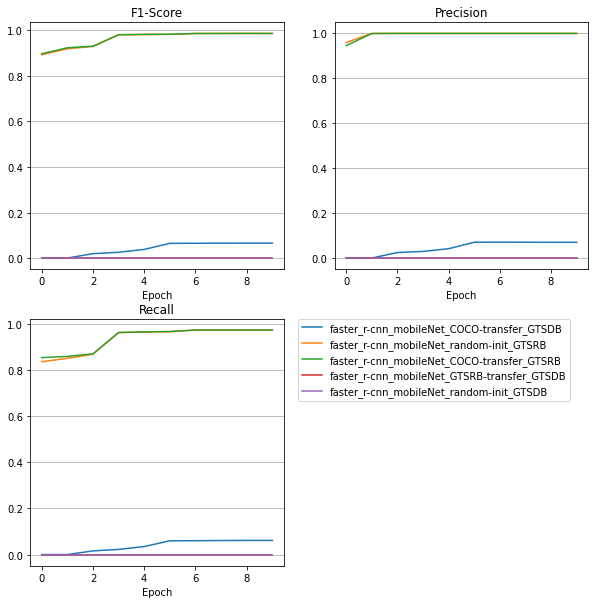

In [155]:
fig, axs = plt.subplots(2,2, figsize=(10,10))
mapping = [axs[0,0],axs[0,1], axs[1,0]]
for i, df in enumerate(dfs):
    mapping[i] = df.plot(ax=mapping[i], legend=False)
    mapping[i].set_xlabel("Epoch")
    mapping[i].grid(axis="y")

axs[0,0].set_title("F1-Score")
axs[0,1].set_title("Precision")
axs[1,0].set_title("Recall")
axs[1,1].axis('off')
handles, labels = axs[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc=(0.5,0.335))
fig.savefig("mobileNet-train.pdf")
fig.show()

### Resnet50

In [134]:
dfs = [
    pd.read_csv("/home/leon/Documents/Studienarbeit/model_results/resnet50-f1-all.csv"),
    pd.read_csv("/home/leon/Documents/Studienarbeit/model_results/resnet50-precision-all.csv"),
    pd.read_csv("/home/leon/Documents/Studienarbeit/model_results/resnet50-recall-all.csv")
]
dfs[0]

,Step,faster_r-cnn_resnet50_fpn_GTSRB-Transfer_GTSDB_10Epochs - AP_IoU=0.50,faster_r-cnn_resnet50_fpn_GTSRB-Transfer_GTSDB_10Epochs - AP_IoU=0.50__MIN,faster_r-cnn_resnet50_fpn_GTSRB-Transfer_GTSDB_10Epochs - AP_IoU=0.50__MAX,faster_r-cnn_resnet50_fpn_GTSRB-Transfer_GTSDB_10Epochs - AR_IoU=0.50:0.95_maxDets=100,faster_r-cnn_resnet50_fpn_GTSRB-Transfer_GTSDB_10Epochs - AR_IoU=0.50:0.95_maxDets=100__MIN,faster_r-cnn_resnet50_fpn_GTSRB-Transfer_GTSDB_10Epochs - AR_IoU=0.50:0.95_maxDets=100__MAX,faster_r-cnn_resnet50_fpn_COCO-transfer_GTSRB_10Epochs - AP_IoU=0.50,faster_r-cnn_resnet50_fpn_COCO-transfer_GTSRB_10Epochs - AP_IoU=0.50__MIN,faster_r-cnn_resnet50_fpn_COCO-transfer_GTSRB_10Epochs - AP_IoU=0.50__MAX,...,faster_r-cnn_resnet50_fpn_random-init_GTSRB_10Epochs - AP_IoU=0.50__MAX,faster_r-cnn_resnet50_fpn_random-init_GTSRB_10Epochs - AR_IoU=0.50:0.95_maxDets=100,faster_r-cnn_resnet50_fpn_random-init_GTSRB_10Epochs - AR_IoU=0.50:0.95_maxDets=100__MIN,faster_r-cnn_resnet50_fpn_random-init_GTSRB_10Epochs - AR_IoU=0.50:0.95_maxDets=100__MAX,faster_r-cnn_resnet50_fpn_random_init_train_GTSDB_10Epochs - AP_IoU=0.50,faster_r-cnn_resnet50_fpn_random_init_train_GTSDB_10Epochs - AP_IoU=0.50__MIN,faster_r-cnn_resnet50_fpn_random_init_train_GTSDB_10Epochs - AP_IoU=0.50__MAX,faster_r-cnn_resnet50_fpn_random_init_train_GTSDB_10Epochs - AR_IoU=0.50:0.95_maxDets=100,faster_r-cnn_resnet50_fpn_random_init_train_GTSDB_10Epochs - AR_IoU=0.50:0.95_maxDets=100__MIN,faster_r-cnn_resnet50_fpn_random_init_train_GTSDB_10Epochs - AR_IoU=0.50:0.95_maxDets=100__MAX
0,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.916397,0.916397,0.916397,...,0.886742,0.781656,0.781656,0.781656,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.998611,0.998611,0.998611,...,0.997957,0.812734,0.812734,0.812734,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,5,0.031114,0.031114,0.031114,0.045766,0.045766,0.045766,0.999119,0.999119,0.999119,...,0.999179,0.835742,0.835742,0.835742,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,7,0.032314,0.032314,0.032314,0.058356,0.058356,0.058356,0.999674,0.999674,0.999674,...,0.999958,0.925008,0.925008,0.925008,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,9,0.037618,0.037618,0.037618,0.064926,0.064926,0.064926,0.999707,0.999707,0.999707,...,0.999970,0.929328,0.929328,0.929328,0.000639,0.000639,0.000639,0.000358,0.000358,0.000358
5,11,0.055872,0.055872,0.055872,0.085665,0.085665,0.085665,0.999734,0.999734,0.999734,...,0.999984,0.930020,0.930020,0.930020,0.000958,0.000958,0.000958,0.001254,0.001254,0.001254
6,13,0.055310,0.055310,0.055310,0.085619,0.085619,0.085619,0.999721,0.999721,0.999721,...,0.999989,0.940172,0.940172,0.940172,0.000958,0.000958,0.000958,0.001254,0.001254,0.001254
7,15,0.058842,0.058842,0.058842,0.087484,0.087484,0.087484,0.999725,0.999725,0.999725,...,0.999990,0.940192,0.940192,0.940192,0.000958,0.000958,0.000958,0.001254,0.001254,0.001254
8,17,0.057783,0.057783,0.057783,0.090439,0.090439,0.090439,0.999722,0.999722,0.999722,...,0.999989,0.940301,0.940301,0.940301,0.000958,0.000958,0.000958,0.001254,0.001254,0.001254
9,19,0.057966,0.057966,0.057966,0.090238,0.090238,0.090238,0.999725,0.999725,0.999725,...,0.999991,0.941096,0.941096,0.941096,0.000958,0.000958,0.000958,0.001254,0.001254,0.001254


In [135]:
for df in dfs:
    columns_to_drop = [x for x in df.columns if "_MIN" in x or "_MAX" in x or "Step" in x]
    df.drop(columns=columns_to_drop, inplace=True)
    # df.drop(columns=["Step"], inplace=True)
dfs[0]

,faster_r-cnn_resnet50_fpn_GTSRB-Transfer_GTSDB_10Epochs - AP_IoU=0.50,faster_r-cnn_resnet50_fpn_GTSRB-Transfer_GTSDB_10Epochs - AR_IoU=0.50:0.95_maxDets=100,faster_r-cnn_resnet50_fpn_COCO-transfer_GTSRB_10Epochs - AP_IoU=0.50,faster_r-cnn_resnet50_fpn_COCO-transfer_GTSRB_10Epochs - AR_IoU=0.50:0.95_maxDets=100,faster_r-cnn_resnet50_fpn_COCO-transfer_GTSDB_10Epochs - AP_IoU=0.50,faster_r-cnn_resnet50_fpn_COCO-transfer_GTSDB_10Epochs - AR_IoU=0.50:0.95_maxDets=100,faster_r-cnn_resnet50_fpn_random-init_GTSRB_10Epochs - AP_IoU=0.50,faster_r-cnn_resnet50_fpn_random-init_GTSRB_10Epochs - AR_IoU=0.50:0.95_maxDets=100,faster_r-cnn_resnet50_fpn_random_init_train_GTSDB_10Epochs - AP_IoU=0.50,faster_r-cnn_resnet50_fpn_random_init_train_GTSDB_10Epochs - AR_IoU=0.50:0.95_maxDets=100
0,0.000000,0.000000,0.916397,0.824014,0.005440,0.001613,0.886742,0.781656,0.000000,0.000000
1,0.000000,0.000000,0.998611,0.856324,0.073265,0.102750,0.997957,0.812734,0.000000,0.000000
2,0.031114,0.045766,0.999119,0.865594,0.129398,0.186722,0.999179,0.835742,0.000000,0.000000
3,0.032314,0.058356,0.999674,0.933691,0.131949,0.205644,0.999958,0.925008,0.000000,0.000000
4,0.037618,0.064926,0.999707,0.936609,0.157376,0.221895,0.999970,0.929328,0.000639,0.000358
5,0.055872,0.085665,0.999734,0.938796,0.181861,0.225375,0.999984,0.930020,0.000958,0.001254
6,0.055310,0.085619,0.999721,0.944155,0.182602,0.226958,0.999989,0.940172,0.000958,0.001254
7,0.058842,0.087484,0.999725,0.944411,0.180933,0.227869,0.999990,0.940192,0.000958,0.001254
8,0.057783,0.090439,0.999722,0.945223,0.183694,0.229789,0.999989,0.940301,0.000958,0.001254
9,0.057966,0.090238,0.999725,0.945898,0.184872,0.229753,0.999991,0.941096,0.000958,0.001254


In [136]:
f1 = {}
models = set()
models.update([x.split(" ")[0] for x in df.columns])
for model in models:
    f1[model] = 2 * (dfs[0][f"{model} - AP_IoU=0.50"] * dfs[0][f"{model} - AR_IoU=0.50:0.95_maxDets=100"]) / (dfs[0][f"{model} - AP_IoU=0.50"] + dfs[0][f"{model} - AR_IoU=0.50:0.95_maxDets=100"])
f1_df = pd.DataFrame(f1)
f1_df.fillna(0, inplace=True)
dfs[0] = f1_df
dfs[0]

,faster_r-cnn_resnet50_fpn_random-init_GTSRB_10Epochs,faster_r-cnn_resnet50_fpn_GTSRB-Transfer_GTSDB_10Epochs,faster_r-cnn_resnet50_fpn_COCO-transfer_GTSRB_10Epochs,faster_r-cnn_resnet50_fpn_random_init_train_GTSDB_10Epochs,faster_r-cnn_resnet50_fpn_COCO-transfer_GTSDB_10Epochs
0,0.830889,0.000000,0.867754,0.000000,0.002488
1,0.895872,0.000000,0.922010,0.000000,0.085538
2,0.910182,0.037044,0.927576,0.000000,0.152862
3,0.961024,0.041595,0.965556,0.000000,0.160753
4,0.963356,0.047636,0.967130,0.000459,0.184148
5,0.963734,0.067633,0.968307,0.001086,0.201293
6,0.969158,0.067205,0.971144,0.001086,0.202378
7,0.969169,0.070360,0.971281,0.001086,0.201707
8,0.969227,0.070514,0.971709,0.001086,0.204172
9,0.969650,0.070588,0.972067,0.001086,0.204883


In [137]:
for df in dfs:
    columns = [x.split(" ")[0].replace("_10Epochs", "") for x in df.columns]
    print(columns)
    df.columns = columns
dfs[0]

['faster_r-cnn_resnet50_fpn_random-init_GTSRB', 'faster_r-cnn_resnet50_fpn_GTSRB-Transfer_GTSDB', 'faster_r-cnn_resnet50_fpn_COCO-transfer_GTSRB', 'faster_r-cnn_resnet50_fpn_random_init_train_GTSDB', 'faster_r-cnn_resnet50_fpn_COCO-transfer_GTSDB']
['faster_r-cnn_resnet50_fpn_GTSRB-Transfer_GTSDB', 'faster_r-cnn_resnet50_fpn_COCO-transfer_GTSRB', 'faster_r-cnn_resnet50_fpn_COCO-transfer_GTSDB', 'faster_r-cnn_resnet50_fpn_random-init_GTSRB', 'faster_r-cnn_resnet50_fpn_random_init_train_GTSDB']
['faster_r-cnn_resnet50_fpn_GTSRB-Transfer_GTSDB', 'faster_r-cnn_resnet50_fpn_COCO-transfer_GTSRB', 'faster_r-cnn_resnet50_fpn_COCO-transfer_GTSDB', 'faster_r-cnn_resnet50_fpn_random-init_GTSRB', 'faster_r-cnn_resnet50_fpn_random_init_train_GTSDB']


,faster_r-cnn_resnet50_fpn_random-init_GTSRB,faster_r-cnn_resnet50_fpn_GTSRB-Transfer_GTSDB,faster_r-cnn_resnet50_fpn_COCO-transfer_GTSRB,faster_r-cnn_resnet50_fpn_random_init_train_GTSDB,faster_r-cnn_resnet50_fpn_COCO-transfer_GTSDB
0,0.830889,0.000000,0.867754,0.000000,0.002488
1,0.895872,0.000000,0.922010,0.000000,0.085538
2,0.910182,0.037044,0.927576,0.000000,0.152862
3,0.961024,0.041595,0.965556,0.000000,0.160753
4,0.963356,0.047636,0.967130,0.000459,0.184148
5,0.963734,0.067633,0.968307,0.001086,0.201293
6,0.969158,0.067205,0.971144,0.001086,0.202378
7,0.969169,0.070360,0.971281,0.001086,0.201707
8,0.969227,0.070514,0.971709,0.001086,0.204172
9,0.969650,0.070588,0.972067,0.001086,0.204883


In [147]:
column_order = dfs[0].columns.to_list()
for i in range(len(dfs)):
    dfs[i] = dfs[i][column_order]
    print(dfs[i].columns.to_list())

dfs[1]

['faster_r-cnn_resnet50_fpn_random-init_GTSRB', 'faster_r-cnn_resnet50_fpn_GTSRB-Transfer_GTSDB', 'faster_r-cnn_resnet50_fpn_COCO-transfer_GTSRB', 'faster_r-cnn_resnet50_fpn_random_init_train_GTSDB', 'faster_r-cnn_resnet50_fpn_COCO-transfer_GTSDB']
['faster_r-cnn_resnet50_fpn_random-init_GTSRB', 'faster_r-cnn_resnet50_fpn_GTSRB-Transfer_GTSDB', 'faster_r-cnn_resnet50_fpn_COCO-transfer_GTSRB', 'faster_r-cnn_resnet50_fpn_random_init_train_GTSDB', 'faster_r-cnn_resnet50_fpn_COCO-transfer_GTSDB']
['faster_r-cnn_resnet50_fpn_random-init_GTSRB', 'faster_r-cnn_resnet50_fpn_GTSRB-Transfer_GTSDB', 'faster_r-cnn_resnet50_fpn_COCO-transfer_GTSRB', 'faster_r-cnn_resnet50_fpn_random_init_train_GTSDB', 'faster_r-cnn_resnet50_fpn_COCO-transfer_GTSDB']


,faster_r-cnn_resnet50_fpn_random-init_GTSRB,faster_r-cnn_resnet50_fpn_GTSRB-Transfer_GTSDB,faster_r-cnn_resnet50_fpn_COCO-transfer_GTSRB,faster_r-cnn_resnet50_fpn_random_init_train_GTSDB,faster_r-cnn_resnet50_fpn_COCO-transfer_GTSDB
0,0.886742,0.000000,0.916397,0.000000,0.005440
1,0.997957,0.000000,0.998611,0.000000,0.073265
2,0.999179,0.031114,0.999119,0.000000,0.129398
3,0.999958,0.032314,0.999674,0.000000,0.131949
4,0.999970,0.037618,0.999707,0.000639,0.157376
5,0.999984,0.055872,0.999734,0.000958,0.181861
6,0.999989,0.055310,0.999721,0.000958,0.182602
7,0.999990,0.058842,0.999725,0.000958,0.180933
8,0.999989,0.057783,0.999722,0.000958,0.183694
9,0.999991,0.057966,0.999725,0.000958,0.184872


/tmp/ipykernel_3638/2358366019.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


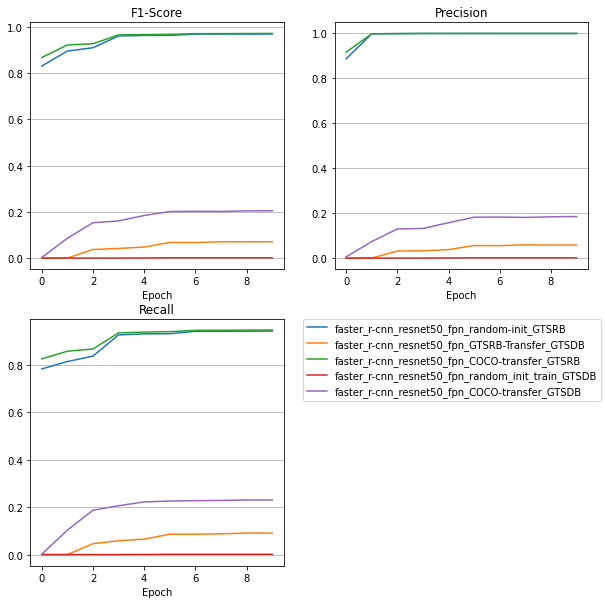

In [148]:
fig, axs = plt.subplots(2,2, figsize=(10,10))
mapping = [axs[0,0],axs[0,1], axs[1,0]]
for i, df in enumerate(dfs):
    mapping[i] = df.plot(ax=mapping[i], legend=False)
    mapping[i].set_xlabel("Epoch")
    mapping[i].grid(axis="y")

axs[0,0].set_title("F1-Score")
axs[0,1].set_title("Precision")
axs[1,0].set_title("Recall")
axs[1,1].axis('off')
handles, labels = axs[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc=(0.5,0.335))
fig.savefig("resnet-train.pdf")
fig.show()

# Overview Tables

In [172]:
df = pd.read_csv("/home/leon/Documents/Studienarbeit/model_results/yolo-overview-table.csv")
df

,Unnamed: 0,Unnamed: 0.1,Name,Runtime (seconds),batch_size,data_dict.nc,epochs,imgsz,best/epoch,best/mAP_0.5,...,metrics/mAP_0.5,metrics/precision,metrics/recall,train/box_loss,train/cls_loss,train/obj_loss,val/box_loss,val/cls_loss,val/obj_loss,F1
0,0,0,yolov5m-random-init-gtsdb,3237,6,43,100,1360,90,0.2270,...,0.2269,0.3578,0.3944,0.0211,0.0714,0.0099,0.0189,0.0739,0.0099,0.375210
1,1,1,yolov5m-gtsrb-transfer-gtsdb,4955,2,43,100,1360,95,0.8340,...,0.8339,0.8294,0.7299,0.0133,0.0027,0.0051,0.0152,0.0235,0.0069,0.776475
2,2,2,yolov5m-random-init-gtsrb,24752,32,43,100,250,99,0.9665,...,0.9664,0.9583,0.9543,0.0092,0.0096,0.0055,0.0050,0.0023,0.0026,0.956296
3,3,3,yolov5s-coco-transfer-gtsdb,2827,2,43,100,1360,99,0.3319,...,0.3313,0.7139,0.3257,0.0139,0.0552,0.0058,0.0140,0.0550,0.0067,0.447321
4,4,4,yolov5m-coco-transfer-gtsrb,18611,64,43,100,250,97,0.9709,...,0.9709,0.9513,0.9542,0.0087,0.0060,0.0052,0.0047,0.0023,0.0025,0.952748
5,5,5,yolov5m-coco-transfer-gtsdb,5201,2,43,100,1360,91,0.4381,...,0.4400,0.8447,0.3613,0.0128,0.0419,0.0050,0.0140,0.0471,0.0060,0.506120


In [173]:
df["F1"] = 2 * (df["metrics/precision"] * df["metrics/recall"]) / (df["metrics/precision"] + df["metrics/recall"])
df = df.round(decimals=4)
df.to_csv("/home/leon/Documents/Studienarbeit/model_results/yolo-overview-table.csv")
df

,Unnamed: 0,Unnamed: 0.1,Name,Runtime (seconds),batch_size,data_dict.nc,epochs,imgsz,best/epoch,best/mAP_0.5,...,metrics/mAP_0.5,metrics/precision,metrics/recall,train/box_loss,train/cls_loss,train/obj_loss,val/box_loss,val/cls_loss,val/obj_loss,F1
0,0,0,yolov5m-random-init-gtsdb,3237,6,43,100,1360,90,0.2270,...,0.2269,0.3578,0.3944,0.0211,0.0714,0.0099,0.0189,0.0739,0.0099,0.3752
1,1,1,yolov5m-gtsrb-transfer-gtsdb,4955,2,43,100,1360,95,0.8340,...,0.8339,0.8294,0.7299,0.0133,0.0027,0.0051,0.0152,0.0235,0.0069,0.7765
2,2,2,yolov5m-random-init-gtsrb,24752,32,43,100,250,99,0.9665,...,0.9664,0.9583,0.9543,0.0092,0.0096,0.0055,0.0050,0.0023,0.0026,0.9563
3,3,3,yolov5s-coco-transfer-gtsdb,2827,2,43,100,1360,99,0.3319,...,0.3313,0.7139,0.3257,0.0139,0.0552,0.0058,0.0140,0.0550,0.0067,0.4473
4,4,4,yolov5m-coco-transfer-gtsrb,18611,64,43,100,250,97,0.9709,...,0.9709,0.9513,0.9542,0.0087,0.0060,0.0052,0.0047,0.0023,0.0025,0.9527
5,5,5,yolov5m-coco-transfer-gtsdb,5201,2,43,100,1360,91,0.4381,...,0.4400,0.8447,0.3613,0.0128,0.0419,0.0050,0.0140,0.0471,0.0060,0.5061


In [174]:
df = pd.read_csv("/home/leon/Documents/Studienarbeit/model_results/mobilenet-overview-table.csv")
df

,Unnamed: 0,Name,Runtime,epochs,AP,AP_IoU=0.50:0.95,AP_IoU=0.75,AR_IoU=0.50:0.95_maxDets=1,AR_IoU=0.50:0.95_maxDets=10,AR,F1
0,0,faster_r-cnn_resnet50_fpn_train_GTSDB,1459,100,0.0723,0.0357,0.0304,0.0534,0.0673,0.0673,0.069710
1,1,faster_r-cnn_mobileNet_GTSRB-transfer_GTSDB,158,10,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,NaN
2,2,faster_r-cnn_mobileNet_COCO-transfer_GTSDB,158,10,0.0701,0.0414,0.0497,0.0479,0.0614,0.0614,0.065462
3,3,faster_r-cnn_mobileNet_random-init_GTSRB,3585,10,1.0000,0.9553,1.0000,0.9730,0.9730,0.9730,0.986315
4,4,faster_r-cnn_mobileNet_random-init_GTSDB,159,10,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,NaN
5,5,faster_r-cnn_mobileNet_COCO-transfer_GTSRB,3573,10,1.0000,0.9541,1.0000,0.9727,0.9727,0.9727,0.986161


In [176]:
df["Name"] = [x.replace("_10Epochs", "") for x in df["Name"]]
df["Name"] = [x.replace("_100Epochs", "") for x in df["Name"]]
df["F1"] = 2 * (df["AP"] * df["AR"]) / (df["AP"] + df["AR"])
df.fillna(0, inplace=True)
df = df.round(decimals=4)
df.to_csv("/home/leon/Documents/Studienarbeit/model_results/mobilenet-overview-table.csv")
df

,Unnamed: 0,Name,Runtime,epochs,AP,AP_IoU=0.50:0.95,AP_IoU=0.75,AR_IoU=0.50:0.95_maxDets=1,AR_IoU=0.50:0.95_maxDets=10,AR,F1
0,0,faster_r-cnn_resnet50_fpn_train_GTSDB,1459,100,0.0723,0.0357,0.0304,0.0534,0.0673,0.0673,0.0697
1,1,faster_r-cnn_mobileNet_GTSRB-transfer_GTSDB,158,10,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,2,faster_r-cnn_mobileNet_COCO-transfer_GTSDB,158,10,0.0701,0.0414,0.0497,0.0479,0.0614,0.0614,0.0655
3,3,faster_r-cnn_mobileNet_random-init_GTSRB,3585,10,1.0000,0.9553,1.0000,0.9730,0.9730,0.9730,0.9863
4,4,faster_r-cnn_mobileNet_random-init_GTSDB,159,10,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
5,5,faster_r-cnn_mobileNet_COCO-transfer_GTSRB,3573,10,1.0000,0.9541,1.0000,0.9727,0.9727,0.9727,0.9862


In [178]:
df = pd.read_csv("/home/leon/Documents/Studienarbeit/model_results/resnet-overview-table.csv")
df

,Name,Runtime,epochs,AP,AR
0,faster_r-cnn_resnet50_fpn_train_GTSDB_100Epochs,2841,100,0.235209,0.256374
1,faster_r-cnn_resnet50_fpn_GTSRB-Transfer_GTSDB...,313,10,0.057966,0.090238
2,faster_r-cnn_resnet50_fpn_COCO-transfer_GTSRB_...,19478,10,0.999725,0.945898
3,faster_r-cnn_resnet50_fpn_COCO-transfer_GTSDB_...,315,10,0.184872,0.229753
4,faster_r-cnn_resnet50_fpn_random-init_GTSRB_10...,19657,10,0.999991,0.941096
5,faster_r-cnn_resnet50_fpn_random_init_train_GT...,410,10,0.000958,0.001254


In [179]:
df["Name"] = [x.replace("_10Epochs", "") for x in df["Name"]]
df["Name"] = [x.replace("_100Epochs", "") for x in df["Name"]]
df["F1"] = 2 * (df["AP"] * df["AR"]) / (df["AP"] + df["AR"])
df.fillna(0, inplace=True)
df = df.round(decimals=4)
df.to_csv("/home/leon/Documents/Studienarbeit/model_results/resnet-overview-table.csv")
df

,Name,Runtime,epochs,AP,AR,F1
0,faster_r-cnn_resnet50_fpn_train_GTSDB,2841,100,0.2352,0.2564,0.2453
1,faster_r-cnn_resnet50_fpn_GTSRB-Transfer_GTSDB,313,10,0.0580,0.0902,0.0706
2,faster_r-cnn_resnet50_fpn_COCO-transfer_GTSRB,19478,10,0.9997,0.9459,0.9721
3,faster_r-cnn_resnet50_fpn_COCO-transfer_GTSDB,315,10,0.1849,0.2298,0.2049
4,faster_r-cnn_resnet50_fpn_random-init_GTSRB,19657,10,1.0000,0.9411,0.9697
5,faster_r-cnn_resnet50_fpn_random_init_train_GTSDB,410,10,0.0010,0.0013,0.0011
